In [8]:
from pathlib import Path
from typing import Tuple

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from confidenceinterval import roc_auc_score
from confidenceinterval.bootstrap import bootstrap_ci
from sklearn.metrics import average_precision_score

In [9]:
n_folds = 1
width = 0.8
capsize=5

# Folder with model results.
folder_results = Path("results_model/")
# Folder where plots are saved.
folder_plot = Path("plots/")

In [10]:
def get_array(folder: Path, model: str)-> Tuple[np.ndarray]:
    """Load all csvs and return arrays with roc and precision-recall.
    
    Args:
        folder (Path): Path to folder containing the results.
        model (str): Name of the model.
        
    Returns:
        roc (np.ndarray): ROC-AUC and confidence interval bounds.
        pr (np.ndarray): PR-AUC and confidence interval bounds.  
    """
    folder_model = folder / model
    roc, pr = [], []
    for fold in range(1, n_folds+1):
        df = pd.read_csv(folder_model / f"fold_{fold}.csv")
        roc.append(roc_auc_score(y_true=df['y_true'],
                                 y_pred=df['y_score'],
                                 random_state=42,
                                 n_resamples=5000,
                                 confidence_level=0.90
                                )
                  )

        pr.append(bootstrap_ci(y_true=df['y_true'],
                        y_pred=df['y_score'],
                        metric=lambda y1, y2: average_precision_score(y1, y2),
                        random_state=42,
                        n_resamples=5000,
                        confidence_level=0.90,
                        )
                 )
        pr.append(average_precision_score(y_true=df['y_true'], y_score=df['y_score']))
    return roc[0], pr[0]

In [11]:
xgb_roc, xgb_pr = get_array(folder_results, "xgb")
rf_roc, rf_pr = get_array(folder_results, "rf")
atm_roc, atm_pr = get_array(folder_results, "atm_tcr")
tulip_roc, tulip_pr =  get_array(folder_results, "tulip")

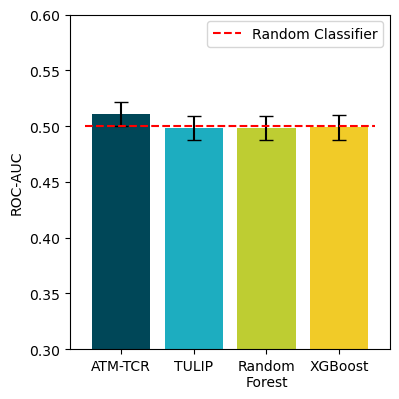

In [12]:
plt.figure(figsize=(4.1,4.1))
plt.bar('ATM-TCR', height=atm_roc[0], color = "#004758", width = width)
plt.errorbar(x=0, y=atm_roc[0], yerr=np.array([[atm_roc[0]-atm_roc[1][0], atm_roc[1][1]-atm_roc[0]]]).T, color = 'black', capsize=capsize)

plt.bar('TULIP', height=tulip_roc[0], color = "#1dadc0", width = width)
plt.errorbar(x=1, y=tulip_roc[0], yerr=np.array([[tulip_roc[0]-tulip_roc[1][0], tulip_roc[1][1]-tulip_roc[0]]]).T, color = 'black', capsize=capsize)

plt.bar('Random\nForest', height=rf_roc[0], color = "#BECD32", width = width)
plt.errorbar(x=2, y=rf_roc[0], yerr=np.array([[rf_roc[0]-rf_roc[1][0], rf_roc[1][1]-rf_roc[0]]]).T, color = 'black', capsize=capsize)

plt.bar('XGBoost', height=xgb_roc[0], color = "#F1CB28", width = width)
plt.errorbar(x=3, y=xgb_roc[0], yerr=np.array([[xgb_roc[0]-xgb_roc[1][0], xgb_roc[1][1]-xgb_roc[0]]]).T, color = 'black', capsize=capsize)

plt.ylim(0.3, 0.6)
plt.hlines(0.5, -0.5, 3.5, linestyles='--', color= 'red', label = 'Random Classifier')
plt.legend()
plt.ylabel('ROC-AUC')
plt.tight_layout()
plt.savefig(folder_plot / "fig2a.pdf")
plt.show()

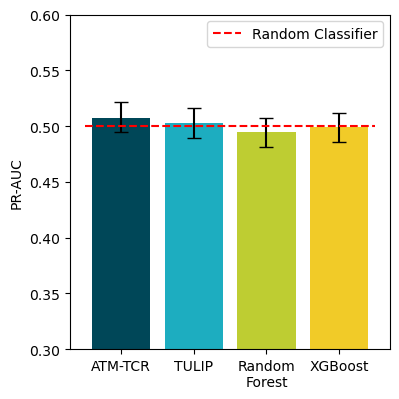

In [13]:
plt.figure(figsize=(4.1,4.1))
plt.bar('ATM-TCR', height=atm_pr[0], color = "#004758", width = width)
plt.errorbar(x=0, y=atm_pr[0], yerr=np.array([[atm_pr[0]-atm_pr[1][0], atm_pr[1][1]-atm_pr[0]]]).T, color = 'black', capsize=capsize)

plt.bar('TULIP', height=tulip_pr[0], color = "#1dadc0", width = width)
plt.errorbar(x=1, y=tulip_pr[0], yerr=np.array([[tulip_pr[0]-tulip_pr[1][0], tulip_pr[1][1]-tulip_pr[0]]]).T, color = 'black', capsize=capsize)

plt.bar('Random\nForest', height=rf_pr[0], color = "#BECD32", width = width)
plt.errorbar(x=2, y=rf_pr[0], yerr=np.array([[rf_pr[0]-rf_pr[1][0], rf_pr[1][1]-rf_pr[0]]]).T, color = 'black', capsize=capsize)

plt.bar('XGBoost', height=xgb_pr[0], color = "#F1CB28", width = width)
plt.errorbar(x=3, y=xgb_pr[0], yerr=np.array([[xgb_pr[0]-xgb_pr[1][0], xgb_pr[1][1]-xgb_pr[0]]]).T, color = 'black', capsize=capsize)

plt.ylim(0.3, 0.6)
plt.hlines(0.5, -0.5, 3.5, linestyles='--', color= 'red', label = 'Random Classifier')
plt.legend()
plt.ylabel('PR-AUC')
plt.tight_layout()
plt.savefig(folder_plot / "fig2b.pdf")
plt.show()
